# BiblioAnalysis_Main

### Version: 0.0.0

### Aims
- This jupyter notebook results from the use analysis of BiblioTools2jupyter notebook and a new implementation of the following parts:
    - Parsing: replaced and tested 
    - Corpus description: replaced and tested
    - Filtering: replaced and tested, integrating the "EXCLUSION" mode and the recursive filtering
    - Cooccurrence analysis : replaced and tested, integrating graph plot and countries GPS coordinates
    - Coupling analyis : replaced and tested
    
### Created modules in the package BiblioAnalysis_Utils
    - BiblioCooc.py
    - BiblioCoupling.py
    - BiblioDescription.py
    - BiblioFilter.py    
    - BiblioGeneralGlobals.py
    - BiblioGlobals.py
    - BiblioGraphPlot.py
    - BiblioGui.py.py
    - BiblioNltk.py
    - BiblioParsingGlobals.py
    - BiblioParsingScopus.py
    - BiblioParsingUtils.py
    - BiblioParsingWos.py
    - BibloRefs.py
    - BiblioTempDev.py

### BiblioTool3.2 source
http://www.sebastian-grauwin.com/bibliomaps/download.html 

### List of initial Python packages extracted from  BiblioTool3.2
- biblio_parser.py	⇒ pre-processes WOS / Scopus data files,
- corpus_description.py	⇒ performs a frequency analysis of the items in corpus,
- filter.py	⇒ filters the corpus according to a range of potential queries but still too specific
- biblio_coupling.py	⇒ performs a BC anaysis of the corpus,
- cooc_graphs.py	⇒ produces various co-occurrence graphs based on the corpus (call parameters changed)

### Specifically required list of pip install 
(to be integrated in the setup.py of BiblioAnalysis_Utils)
- !pip3 install squarify 
- !pip3 install inquirer
- !pip3 install python-louvain
- !pip3 install pyvis

### Specifically required nltk downloads 
(integrated in BiblioNltk.py of BiblioAnalysis_Utils)
- import nltk
    - nltk.download('punkt')
    - nltk.download('averaged_perceptron_tagger')
    - nltk.download('wordnet')

## Preliminary instructions
#### These actions will be interactively performed in the next version of the Jupyter notebook
- Create the 'BiblioAnalysis_Files/' folder in your 'Users/' folder
<br>
<br>
- Create in this 'BiblioAnalysis_Files/' folder, the 'Configuration_Files/' folder
<br>
- Store the configuration files (config_filter.json) a the 'Configuration_Files/' folder that are:
    - 'config_filter.json' used for the filtering of a corpus
    - 'congig_temporal.json'used for the temporal development of item values in a set of annual coupuses 
<br>
<br>
- Create, in the 'Configuration_Files/' folder, your additional_files folder to be named 'Selection_Files/' 
<br>
- Store your files (free names) of selected item values in this additional_files folder together with:
    - 'TempDevK_full.txt' used to select the words to search in the description files of the corpuses for the temporal development of item values in the set of annual coupuses
<br>
<br>
- Create, in the 'BiblioAnalysis_Files/' folder, your project folder
<br>
- Create the 'rawdata/' folder in your project folder
<br>
- Store your corpus file (either wos or scopus extraction) in the 'rawdata/' folder of your project folder
<br>


# I- User environment setting

In [1]:
# Standard library imports
import platform
import os
from IPython.display import clear_output
from pathlib import Path

# Local imports
import BiblioAnalysis_Utils as bau

clear_output(wait=True)

# Set the venv use status
venv = False
print('Virtual environment: ', venv)

# Get the information of current operating system
os_name = platform.uname().system
print('Operating system:    ', os_name)
if os_name=='Darwin':bau.add_site_packages_path(venv)

# User identification
user_root = Path.home()
user_id =  str(user_root)[str(user_root).rfind('/')+1:]
print('User:                ', user_id)
expert =  False

# Getting the corpuses folder
 # Setting the GUI titles
gui_titles = {'main':   'Corpuses folder selection window',
              'result': 'Selected folder'}
gui_buttons = ['SELECTION','HELP']

corpuses_folder = bau.select_folder_gui_new(user_root, gui_titles, gui_buttons, bau.GUI_DISP)
print('\nCorpuses folder:', corpuses_folder)

Virtual environment:  False
Operating system:     Darwin
Added paths:          /Library/Frameworks/Python.framework/Versions/current/lib/python3.9/site-packages
User:                 amal

Corpuses folder: /Users/amal/BiblioAnalysis_Files/0_Corpuses


# II- Single year corpus analysis

## &emsp;&emsp;II-1 Selection of the corpus file for BiblioAnalysis

In [5]:
# Standard library imports
import os
from pathlib import Path

# Local imports
import BiblioAnalysis_Utils as bau

## Selection of corpus file
corpusfiles_list = os.listdir(corpuses_folder)
corpusfiles_list.sort()
print('Please select the corpus via the tk window')
myprojectname = bau.Select_multi_items(corpusfiles_list,'single',2)[0]+'/'
project_folder = corpuses_folder /Path(myprojectname)
database_type = input('Corpus file type (scopus, wos - default: "wos")? ')
if database_type =='': database_type = 'wos' 

rep_utils =''
if database_type =='scopus':
     # Get the folder for the general files
     # and specific files for scopus type database in this folder
    if os_name=='Darwin':
        rep_utils = os.path.abspath('BiblioAnalysis_RefFiles')        
    else:
        gui_titles = {'main':   'Folder selection window for categories files of scopus ',
                      'result': 'Selected folder'}
        gui_buttons = ['SELECTION','HELP']
        rep_utils = bau.select_folder_gui_new(user_root, gui_titles, gui_buttons, bau.GUI_DISP)
    scopus_cat_codes = bau.SCOPUS_CAT_CODES
    scopus_journals_issn_cat = bau.SCOPUS_JOURNALS_ISSN_CAT
    print('Folder for the categories files of scopus:', rep_utils)       
    
## Setting the  graph main heading
digits_list = list(filter(str.isdigit, myprojectname))
corpus_year = ''
for i in range(len(digits_list)):corpus_year = corpus_year + digits_list[i]
init = str(corpuses_folder).rfind("_")+1
corpus_state = str(corpuses_folder)[init:]
main_heading = corpus_year + ' Corpus:' + corpus_state

## Printing useful information
#print('\nSpecific-paths set for user: ', user_id)
#print('Project folder:              ', project_folder)
#print('Corpus year:                 ', corpus_year)
#print('Corpus status:               ', corpus_state)
#print('Project name:                ', myprojectname)
#print('Corpus file type:            ', database_type)

dict_print = {'Specific-paths set for user:': user_id,
              'Project folder:': project_folder,
              'Corpus year:': corpus_year,
              'Corpus status:': corpus_state,
              'Project name:': myprojectname,
              'Corpus file type:':database_type}

pad = 3
max_len_str = max( [len(str(x)) for x in dict_print.values()]) + pad
print('\n')
for key,val in dict_print.items():
    print(key.ljust(max_len_str),val)


Please select the corpus via the tk window


Corpus file type (scopus, wos - default: "wos")?  scopus


Folder for the categories files of scopus: /Users/amal/My_Jupyter/BiblioAnalysis/BiblioAnalysis_RefFiles


Specific-paths set for user:                                     amal
Project folder:                                                  /Users/amal/BiblioAnalysis_Files/0_Corpuses/Corpus_Liten_2020
Corpus year:                                                     2020
Corpus status:                                                   Corpuses
Project name:                                                    Corpus_Liten_2020/
Corpus file type:                                                scopus


## &emsp;&emsp;II-2 Data parsing

In [6]:
# Standard libraries import
import os
import json
from pathlib import Path

# Local imports
import BiblioAnalysis_Utils as bau

## Building the names of the useful folders

    # Folder containing the wos or scopus file to process
in_dir_parsing = project_folder / Path(bau.FOLDER_NAMES['rawdata'])

    # Folder containing the output files of the data parsing 
out_dir_parsing = project_folder / Path(bau.FOLDER_NAMES['parsing'])
if not os.path.exists(out_dir_parsing):
    os.mkdir(out_dir_parsing)

## Running function biblio_parser
parser_done = input("Parsing available (y/n)? ")
if parser_done == "n":
     # Setting the specific affiliations filter (default = None)
    second_inst = input("Secondary institutions to be parsed (y/n)? ")
    if second_inst=='y' : 
        inst_filter_dic= {'secondary_inst': ['LITEN', 'INES'],
                          'country': 'France'} 
    else:
        inst_filter_dic = None
    bau.biblio_parser(in_dir_parsing, out_dir_parsing, database_type, expert, rep_utils, inst_filter_dic) 
    with open(Path(out_dir_parsing) / Path('failed.json'), 'r') as failed_json:
            data_failed=failed_json.read()
    dic_failed = json.loads(data_failed)
    articles_number = dic_failed["number of article"]
    print("Parsing processed on full corpus")
    print("\n\nSuccess rates")
    del dic_failed['number of article']
    for item, value in dic_failed.items():
        print(f'    {item}: {value["success (%)"]:.2f}%')
else:
    parser_filt = input("Parsing available without rawdata -from filtering- (y/n)? ")
    if parser_filt == "n":        
        with open(Path(out_dir_parsing) / Path('failed.json'), 'r') as failed_json:
            data_failed=failed_json.read()
        dic_failed = json.loads(data_failed)
        articles_number = dic_failed["number of article"]
        #clear_output(wait=True)
        print("Parsing available from full corpus")
        print("\n\nSuccess rates")
        del dic_failed['number of article']
        for item, value in dic_failed.items():
            print(f'    {item}: {value["success (%)"]:.2f}%')
    else:
        #clear_output(wait=True)
        print("Parsing available from filtered corpus without rawdata")
        file = project_folder /Path('parsing/' + 'articles.dat')
        with open(file) as f:
            lines = f.readlines()
        articles_number = len(lines)

print("\n\nCorpus parsing saved in folder:\n", str(out_dir_parsing))
print('\nNumber of articles in the corpus : ', articles_number)


Parsing available (y/n)?  n
Secondary institutions to be parsed (y/n)?  y


Parsing processed on full corpus


Success rates
    AK: 73.12%
    IK: 88.17%
    TK: 100.00%
    Address: 100.00%
    Country: 98.92%
    Institution: 100.00%
    authors_inst: 100.00%
    Subject: 98.39%
    Sub_subject: 98.39%


Corpus parsing saved in folder:
 /Users/amal/BiblioAnalysis_Files/0_Corpuses/Corpus_Liten_2020/parsing

Number of articles in the corpus :  186


###  &emsp;&emsp;II-2.1 Data parsing / Corpus description

Description available (y/n)?  n


Corpus description saved in folder: /Users/amal/BiblioAnalysis_Files/0_Corpuses/Corpus_Liten_2020/freq


Treemap for an item of the corpus description (y/n)?  y


Choose the item for treemap in the tk window
Item selected: subjects


Enter the number of items to be used for the treemap (min = 1, max = 22):  20


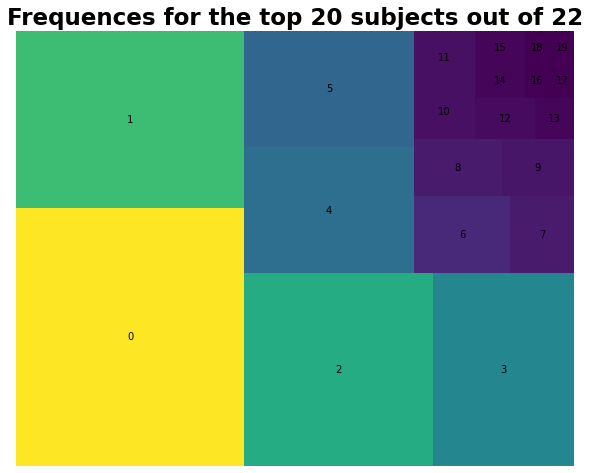

alias subjects                                                    counts  freq
0     Materials Science                                           71      51.825
1     Energy & Fuels                                              49      35.766
2     Chemistry                                                   44      32.117
3     Physics                                                     33      24.088
4     Science & Technology - Other Topics                         26      18.978
5     Engineering                                                 24      17.518
6     Electrochemistry                                            9       6.569
7     Thermodynamics                                              6       4.38
8     Mineralogy                                                  6       4.38
9     Metallurgy & Metallurgical Engineering                      5       3.65
10    Crystallography                                             4       2.92
11    Mechanics                        

Scatter plot for the item (y/n)?  n
Histogram plot for the item (y/n)?  n


Treemap for a new item (y/n)?  n


In [4]:
# Standard libraries import
import os
import json
from pathlib import Path
from IPython.display import clear_output

# Local imports
import BiblioAnalysis_Utils as bau

## Building the names of the useful folders

    # Folder containing the wos or scopus parsed files
in_dir_corpus = out_dir_parsing

    # Folder containing the wos or scopus parsed and analysed files
out_dir_corpus = project_folder / Path(bau.FOLDER_NAMES['description'])
if not os.path.exists(out_dir_corpus):
    os.mkdir(out_dir_corpus)    

## Running describe_corpus
description_done = input("Description available (y/n)? ")
#clear_output(wait=True)
if description_done == "n":
    verbose = False
    bau.describe_corpus(in_dir_corpus, out_dir_corpus, database_type, verbose)
    print("Corpus description saved in folder:", str(out_dir_corpus))
else:
    print("Corpus description available in folder:", str(out_dir_corpus))

# Building the name of file for histogram plot of an item
fullpath_distrib_item = out_dir_corpus / Path(bau.DISTRIBS_ITEM_FILE)

## Running plot of treemap, scatter plot and histogram for a selected item_treemap
do_treemap = input("Treemap for an item of the corpus description (y/n)? ")
if do_treemap == 'y':
    renew_treemap = 'y'
    while renew_treemap == 'y' :
        print("Choose the item for treemap in the tk window")
        item_treemap = bau.treemap_item_selection()
        fullpath_file_treemap = out_dir_corpus / Path('freq_'+ item_treemap +'.dat')
        print("Item selected:",item_treemap)
        bau.treemap_item(item_treemap, fullpath_file_treemap)
        do_scatter = input("Scatter plot for the item (y/n)? ")
        if do_scatter == 'y':
            bau.plot_counts(item_treemap, fullpath_file_treemap)
        do_histo = input("Histogram plot for the item (y/n)? ")
        if do_histo == 'y':
            bau.plot_histo(item_treemap, fullpath_distrib_item)
        renew_treemap = input("\n\nTreemap for a new item (y/n)? ")

# Initialize the variable G_coupl that will receive the biblioanalysis coupling graphs
try: G_coupl
except NameError: G_coupl = None

#### &emsp;&emsp;II-2.1.1 Data parsing / Corpus description / Filtering the data and filtered corpus description
To be run after corpus description to allow using the following functions : describe_corpus() , treemap_item()

In [ ]:
# Standard libraries import
import glob
import json
import os
from pathlib import Path
import shutil                      

# Local imports
import BiblioAnalysis_Utils as bau

## Recursive filtering

# Allows prints in filter_corpus_new function
verbose = False

# Initialization of parameters for recursive filtering
filtering_step = 1
while True:

    ## Building the names of the useful folders and creating the output folder if not find 
    if filtering_step == 1:
        in_dir_filter = out_dir_parsing
        ### Get the folder for the filter configuration file         
        gui_titles = {'main':   'Folder selection GUI for config_filters.json file ',
                      'result': 'Selected folder'}
        gui_buttons = ['SELECTION','HELP']
        filter_config_folder = bau.select_folder_gui_new(user_root, gui_titles, gui_buttons, bau.GUI_DISP,
                                                         widget_ratio=1, button_ratio=1, 
                                                         max_lines_nb=3)
        
        print('Filter configuration folder:', filter_config_folder)
        file_config_filters = filter_config_folder / Path('config_filters.json')
        print('Filter configuration file:',file_config_filters)
        modif_filtering = input("Modification of item-values list from a predefined file (y/n)? ")
        if modif_filtering == "y":
            bau.filters_modification(filter_config_folder,file_config_filters)    
    else:
        renew_filtering = input("Apply a new filtering process (y/n)? ") 
        if renew_filtering == "n": break
        in_dir_filter = project_folder / Path(bau.FOLDER_NAMES['filtering'] + '_' + str(filtering_step-1))
        file_config_filters = in_dir_filter / Path('save_config_filters.json')
        print('Filter configuration file:',file_config_filters) 
        
    out_dir_filter = project_folder / Path(bau.FOLDER_NAMES['filtering'] + '_' + str(filtering_step))
            
    if not os.path.exists(out_dir_filter):
        os.mkdir(out_dir_filter)
    else:
        print('out_dir_filter exists')
        files = glob.glob(str(out_dir_filter) + '/*.*')
        for f in files:
            os.remove(f)

    # Building the absolute file name of filter configuration file to save for the filtering step
    save_config_filters = out_dir_filter / Path(bau.SAVE_CONFIG_FILTERS)
    print('\nSaving filter configuration file:',save_config_filters)
    
    # Configurating the filtering through a dedicated GUI or getting it from the existing file
    bau.filters_selection(file_config_filters,save_config_filters,in_dir_filter,
                         fact=3, win_widthmm=85, win_heightmm=115, font_size=16)
    shutil.copyfile(save_config_filters, file_config_filters)

    # Read the filtering status
    combine,exclusion,filter_param = bau.read_config_filters(file_config_filters) 
    print("\nFiltering status:")
    print("   Combine   :",combine)
    print("   Exclusion :",exclusion)
    for key,value in filter_param.items():
        print(f"   Item      : {key}\n   Values    : {value}\n")

    # Running function filter_corpus_new
    bau.filter_corpus_new(in_dir_filter, out_dir_filter, verbose, file_config_filters) # <---???
    file = out_dir_filter /Path('articles.dat')
    with open(file) as f:
        lines = f.readlines()
        articles_number = len(lines)
    if articles_number == 0:
        print('Filtered corpus empty !')
        break
    print("Filtered-corpus parsing saved in folder ", 
            str(out_dir_filter),
            " with the corresponding filters configuration")

        # Folder containing the wos or scopus parsed and filtered files
    in_dir_freq_filt = out_dir_filter

        # Folder containing the wos or scopus parsed, filtered and analysed files
    out_dir_freq_filt = project_folder / Path(bau.FOLDER_NAMES['description'] + '_' + str(filtering_step))
    if not os.path.exists(out_dir_freq_filt): os.mkdir(out_dir_freq_filt)

        # Running describe_corpus 
    verbose = False
    bau.describe_corpus(in_dir_freq_filt, out_dir_freq_filt, database_type, verbose)
    print("Filtered corpus description saved in folder:", str(out_dir_freq_filt))

    # Treemap plot by a corpus item after filtering
    make_treemap = 'n'
    make_treemap = input("\n\nDraw treemap (y/n)?")
    if make_treemap == 'y' :

            # Running plot of treemap for selected item_treemap
        renew_treemap = 'y'    
        while renew_treemap == 'y' :
            print('\n\nChoose the item for treemap of the filtered corpus description in the tk window')
            item_treemap = bau.treemap_item_selection()
            file_name_treemap = project_folder / Path(bau.FOLDER_NAMES['description'] + '_'\
                                                      + str(filtering_step) + '/' + 'freq_'+ item_treemap +'.dat')
            print("Item selected:",item_treemap)
            bau.treemap_item(item_treemap, file_name_treemap)
            renew_treemap = input("\n\nTreemap for a new item (y/n)? ") 

    filtering_step += 1



#### &emsp;&emsp;II-2.1.2 Data parsing / Corpus Description / Bibliographic Coupling analysis
To be run after corpus description to use the frequency analysis. You may execute the bibliographic coupling script several times successively on unfiltered corpus and on available filtering steps of the corpus.
The result files are saved in independant folders.

In [ ]:
# Standard libraries import
import glob
from IPython.display import clear_output

# Local imports
import BiblioAnalysis_Utils as bau

# Building the names of the useful folders and creating the output folder if not find  
filtering = input(
                  "Corpus filtered (y/n)? "
                 )   
if filtering == "y":
    filtering_step = input(
                            "Enter filtering step : "
                          ) 
    in_dir_coupling = project_folder / Path(bau.FOLDER_NAMES['filtering'] + '_' + str(filtering_step))
    in_dir_freq= project_folder / Path(bau.FOLDER_NAMES['description'] + '_' + str(filtering_step))
    out_dir_coupling = project_folder / Path(bau.FOLDER_NAMES['coupling'] + '_' + str(filtering_step))
else:
    in_dir_coupling = out_dir_parsing
    in_dir_freq= out_dir_corpus    
    out_dir_coupling = project_folder / Path(bau.FOLDER_NAMES['coupling'])

if not os.path.exists(out_dir_coupling):
    os.mkdir(out_dir_coupling)
else:
    print('out_dir_coupling exists')
    files = glob.glob(str(out_dir_coupling) + '/*.html')
    for f in files:
        os.remove(f)
    
# Building the coupling graph of the corpus
print('Building the coupling graph of the corpus, please wait...')
G_coupl = bau.build_coupling_graph(in_dir_coupling)

# Building the partition of the corpus
print('Building the partition of the corpus, please wait...')
G_coupl,partition = bau.build_louvain_partition(G_coupl)
print()

# Adding attributes to the coupling graph nodes
attr_dic = {}
add_attrib = input("Add attributes to the coupling graph nodes (y/n)? ")
if add_attrib == 'y':
    while True:
        print('\n\nChoose the item for the attributes to add in the tk window')
        item, m_max_attrs = bau.coupling_attr_selection(fact=2, win_widthmm=80, win_heightmm=60, font_size=16)
        attr_dic[item] = m_max_attrs
        print("Item selected:",item," with ",m_max_attrs, " attributes" )
        G_coupl = bau.add_item_attribute(G_coupl, item, m_max_attrs, in_dir_freq, in_dir_coupling)
        renew_attrib = input("\nAdd attributes for a new item (y/n)?") 
        if renew_attrib == 'n' : break      

# Plot control of the coupling graph before using Gephy
NODES_NUMBER_MAX = 1
bau.plot_coupling_graph(G_coupl,partition,nodes_number_max=NODES_NUMBER_MAX)

# Creating a Gephy file of the coupling graph  
bau.save_graph_gexf(G_coupl,out_dir_coupling)
print("\nCoupling analysis of the corpus saved as Gephy file in folder:\n", str(out_dir_coupling))

# Creating an EXCEL file of the coupling analysis results
bau.save_communities_xls(partition,in_dir_coupling,out_dir_coupling)
print("\nCoupling analysis of the corpus saved as EXCEL file in folder:\n", str(out_dir_coupling))


#### &emsp;&emsp;II-2.1.3  HTML graph of coupling analysis 
##### after Data parsing / Corpus Description / Coupling analysis  
You may execute the HTML graph construction script several times successively on the available coupling graph of the corpus. The result files are saved in the corresponding coupling floder.

In [ ]:
'''Creating html file of graph G using pyviz
   This script uses the results of the Biblioanalysis coupling analysis:
   - out_dir_coupling (Path): path for saving the coupling analysis results;
   - G (networkx object): coupling graph with added attributes;
   - partition (dict):  partition of graph G;
   - attr_dic (dict): dict of added attributes with number of added values. 
   
'''

# Local imports
import BiblioAnalysis_Utils as bau

# Checking the availability of the corpus coupling graph G with all attributes and its partition
assert(G_coupl is not None),'''Please run first the "Bibliographic coupling analysis" 
                                script to build the coupling graph'''

# Setting the item label among the added attribute to be colored
colored_attr = input('Please enter the item label among the added attributes to be colored (default: S)')
if colored_attr == '':colored_attr = 'S'
print('Attribute to be colored:',colored_attr)
if colored_attr == 'S': 
    heading3 = 'Colored by main discipline (grey: without filtering subjects as main discipline).'
else:
    heading3 = 'Colored by main attribute values (grey: without filtering attribute values as main discipline).'
assert(colored_attr in attr_dic.keys()),\
    f'''Selected colored attribute should be among the added attributes: {list(attr_dic.keys())}.
Please run this script again to select an effectivelly added attribute to the coupling graph node 
or run again the "Bibliographic coupling analysis" script to add the targetted attribute to the coupling graph.'''

# Setting the colors for the values of the attribute to be colored
# default: values of 'S' item from a particular corpus
# TO DO: define the list of the attribute values through a GUI
colored_attr_values = {'Neurosciences & Neurology':'0',
                  'Psychology':'1',
                  'Computer Science':'2',
                  'Robotics,Automation & Control Systems':'3',
                  'Life Sciences & Biomedicine - Other Topics':'4',
                  'Biochemistry & Molecular Biology':'4',
                  'Cell Biology':'4',
                  'Evolutionary Biology':'4',
                  'Biomedical Social Sciences':'4',
                  'Biotechnology & Applied Microbiology':'4',
                  'Developmental Biology':'4',
                  'Microbiology':'4',
                  'Marine & Freshwater Biology':'4',
                  'Reproductive Biology':'4',
                  'Genetics & Heredity':'4',
                  'Philosophy':'5',
                  'History & Philosophy of Science':'5',
                  'Social Sciences - Other Topics':'6',
                  'Mathematical Methods In Social Sciences':'6',
                  'Linguistics':'7',
                  'Anthropology':'8',
                 }

# Setting the attribute value to be specifically shaped
shaped_attr = input('Please enter the added attribute value to be specifically shaped (default: Psychology)')
if shaped_attr == '':shaped_attr = 'Psychology'
print('Attribute value to be specifically shaped (triangle):',shaped_attr)
heading4 = 'Triangles for "' + shaped_attr + '" in disciplines.'

# Computing the number of communities
community_number = len(set(partition.values()))
print('Number of communities:',community_number)

# Computing the size of the communities
communities_size = {}
for value in set(partition.values()):
    communities_size[value]=0
    for key in set(partition.keys()):
        if partition[key] == value:
            communities_size[value]+=1
            
# Building the html graphs per community
for community_id in range(community_number):
    community_size = communities_size[community_id] 
    heading2 = 'Coupling graph for community ID: ' + str(community_id) + ' Size: ' + str(community_size)
    heading = '<h1>' + main_heading + '</h1>' + '<h2>' + heading2 + '</h2>' \
                  + '<h3 align=left nowrap>' + heading3 + '<br>'  + heading4 + '</h3>'
    html_file= str(out_dir_coupling /Path('coupling_' + 'com' + str(community_id) \
                                          + '_size' + str(community_size) + '.html'))
    #bau.coupling_graph_html_plot(G_coupl,html_file,community_id,attr_dic,colored_attr,
    #                             colored_attr_values,shaped_attr,nodes_colors,edges_color,
    #                             background_color,font_color,heading)
    bau.coupling_graph_html_nwplt(G_coupl,html_file,community_id,attr_dic,colored_attr,
                                  colored_attr_values,shaped_attr,heading)
# Building the html graph for the full corpus
heading2  = ' All ' + str(community_number) + ' communities'
heading = '<h1>' + main_heading + '</h1>' + '<h2>' + heading2 + '</h2>' \
          + '<h3 align=left nowrap>' + heading3 + '<br>'  + heading4 + '</h3>'
html_file= str(out_dir_coupling /Path('coupling_' + 'all.html'))
#bau.coupling_graph_html_plot(G_coupl,html_file,'all',attr_dic,colored_attr,
#                         colored_attr_values,shaped_attr,nodes_colors,edges_color,
#                         background_color,font_color,heading)
bau.coupling_graph_html_nwplt(G_coupl,html_file,'all',attr_dic,colored_attr,
                              colored_attr_values,shaped_attr,heading)

print("\nCreated html files of graph G_coupl using pyviz for the corpus in folder:\n", str(out_dir_coupling))


### &emsp;&emsp;II-2.2 Data parsing / Co-occurrence Maps
You may execute the co-occurence script several times successively on unfiltered corpus and on available filtering steps of the corpus.
The result files are saved in independant folders.

In [ ]:
# Local imports
import BiblioAnalysis_Utils as bau

# Building the names of the useful folders and creating the output folder if not find 
filtering = input(
                  "Corpus filtered (y/n)? "
                 )   
if filtering == "y":
    filtering_step = input(
                            "Enter filtering step : "
                          ) 
    in_dir_cooc = project_folder / Path(bau.FOLDER_NAMES['filtering'] + '_' + str(filtering_step))
    out_dir_cooc = project_folder / Path(bau.FOLDER_NAMES['cooccurrence'] + '_' + str(filtering_step))
else:
    in_dir_cooc = out_dir_parsing   
    out_dir_cooc = project_folder / Path(bau.FOLDER_NAMES['cooccurrence']) 

if not os.path.exists(out_dir_cooc):
    os.mkdir(out_dir_cooc)
else:
    print('out_dir_cooc available')

## Building the co-ocurrence graph
size_min = 1
node_size_ref=300
while True :
    print('\n\nChoose the item for co-occurrence analysis in the tk window')
    cooc_item, size_min = bau.cooc_selection(fact=3, win_widthmm=80, win_heightmm=100, font_size=16) 
    print("Item selected:",cooc_item," at minimum size ",size_min)
    out_dir_cooc_item = out_dir_cooc / Path('cooc_' + cooc_item + \
                                            '_thr' + str(size_min))
    if not os.path.exists(out_dir_cooc_item):
        os.mkdir(out_dir_cooc_item)
    else:
        print('out_dir_cooc_item available')
    G_cooc = bau.build_item_cooc(cooc_item,in_dir_cooc, out_dir_cooc_item, size_min = size_min)
    if G_cooc is None:
        print(f'The minimum node size ({size_min}) is two large. Relax this constraint.')
    else:
        print("Co-occurrence analysis of the corpus for item " + cooc_item + \
          " saved in folder:", str(out_dir_cooc_item))
        heading2 = 'Co_occurence graph for item ' + cooc_item + ' with minimum node size ' + str(size_min)
        heading3 = 'Bold node title: Node attributes[number of item value occurrences-item value (total number of edges)]'
        heading4 = 'Light node titles: Neighbors attributes[number of item value occurrences-item value (number of edges with node)]'
        heading = '<h1>' + main_heading + '</h1>' + '<h2>' + heading2 + '</h2>' \
                  + '<h3 align=left nowrap>' + heading3 + '<br>'  + heading4 + '</h3>'
    
        bau.plot_cooc_graph(G_cooc,cooc_item,size_min=size_min,node_size_ref=node_size_ref)
        # Creating html file of graph G_cooc using pyviz
        html_file= str(out_dir_cooc_item /Path('cooc_' + cooc_item + '_thr' + str(size_min) + '.html'))
        bau.cooc_graph_html_plot(G_cooc,html_file,heading)
        print("Created html file of",cooc_item,"co-occurrence graph using pyviz in folder:\n",\
              str(out_dir_cooc_item))
        
    renew_cooc = input("\n\nCo-occurrence analysis for a new item (y/n)?") 
    if renew_cooc == 'n' : break


# III- Temporal development of item values weight
To run this cell a set of annual corpuses with their description should be available 

In [ ]:
# Standard libraries import
import json
from pathlib import Path
from IPython.display import clear_output

# Local imports
import BiblioAnalysis_Utils as bau

# Initialize the search configuration dict 
keyword_filters = {
    'is_in':[],    
    'is_equal':[]}

## Get the folder for the configuration file for the temporal development analysis 
# To Do : use the new gui
temporaldev_config_folder = bau.select_folder_gui(user_root,'Select the folder for config_temporal.json file')
print('Item_values selection folder:', temporaldev_config_folder )

## Building the search configuration:
#### - either by reading of the 'config_temporal.json' without modification
#### - or by an interactive modification of the configuration and storing it in this file for a futher use
TemporalDev_file = temporaldev_config_folder / Path('config_temporal.json')

keywords_modif = input('Modification of the keywords list (y/n)?')
if keywords_modif == 'y':
    
        # Selection of items
    items_full_list = ['IK','AK','TK','S','S2']
    print('\nPlease select the items to be analyzed via the tk window')
    items = bau.Select_multi_items(items_full_list,'multiple')

        # Selection of the folder of item-values full-list file
        # To Do : use the new gui
    select_folder = bau.select_folder_gui(user_root,'Select the folder of the item-values list files')

        # Setting the file of the item-values full list  
    keywords_full_list_file = select_folder / Path('TempDevK_full.txt')
    
        # Setting the list of item-values full list
    keywords_full_list = bau.item_values_list(keywords_full_list_file)
    
        # Selection of the item-values list to be put in the temporal development configuration file 
    search_modes = ['is_in','is_equal']
    for search_mode in search_modes:
        print('\nPlease select the keywords for ',search_mode, ' via the tk window')
        keyword_filters[search_mode] = bau.Select_multi_items(keywords_full_list,mode = 'multiple')
        
    # Saving the new configuration in the 'config_temporal.json' file   
    bau.write_config_temporaldev(TemporalDev_file,items,keyword_filters)
    print('\n New temporal development configuration saved in: \n', TemporalDev_file)    
else:
    # Reading the search configuration from the 'config_temporal.json' file  
    items,keywords_param = bau.read_config_temporaldev(TemporalDev_file)
    print('Selection of items:\n',items)    
    keyword_filters['is_in'] = keywords_param['is_in']
    keyword_filters['is_equal'] = keywords_param['is_equal']

## Selection of annual corpus files
corpusfiles_list = os.listdir(corpuses_folder)
corpusfiles_list.sort()
print('\nPlease select the corpuses to be analyzed via the tk window')
years = bau.Select_multi_items(corpusfiles_list,'multiple')

# Print configuration
print('Search items:', items)
print('\nSearch Words:\n' + json.dumps(keyword_filters, indent=2))
print('\n Selection of annual corpus files:\n',years, '\n')

# Performing the search using the keyword_filters dict
keyword_filter_list = bau.temporaldev_itemvalues_freq(keyword_filters ,items, years, corpuses_folder)

# Saving the search results in an EXCEL file
store_file = corpuses_folder / Path('Results_Files/TempDev_synthesis.xlsx')
bau.temporaldev_result_toxlsx(keyword_filter_list,store_file)
print('\nTemporal development results saved in:\n', store_file) 


# Annexe 1- Databases merging

In [ ]:
# Local imports
import BiblioAnalysis_Utils as bau

database, filename, in_dir, out_dir = bau.merge_database_gui()
bau.merge_database(database,filename,in_dir,out_dir)

# Annexe 2- Item values selection to list for filters configuration

In [ ]:
# Standard library imports
from pathlib import Path

# Local imports
import BiblioAnalysis_Utils as bau

# Get the folder for the filter configuration file 
# To Do : use the new gui
filter_config_folder = bau.select_folder_gui(user_root,'Select the folder for the config_filters.json file')
print('Filter configuration folder:', filter_config_folder) 

file_config_filters = filter_config_folder/ Path('config_filters.json')    
bau.filters_modification(filter_config_folder,file_config_filters)

# Annexe 3- Upgrade of parsing files with column names

In [ ]:
# Local imports
import BiblioAnalysis_Utils as bau

# Get the folder for the filter configuration file
# To Do : use the new gui
corpus_folder_to_upgrade = bau.select_folder_gui(user_root,'Select the corpus folder to upgrade')
print('Corpus folder to upgrade:', corpus_folder_to_upgrade) 
bau.upgrade_col_names(corpus_folder_to_upgrade)

# Documentation

## Data parsing
- articles.dat is the central file, listing all the publications within the corpus. It contains informations such as the document type (article, letter, review, conf proceeding, etc), title, year of publication, publication source, doi, number of citations (given by WOS or Scopus at the time of the extraction) AND a unique identifier used in all the other files to identify a precise publication.
- database.dat keeps track of the origin of the data, some part of the analysis being specific to WOS or Scopus data.
- authors.dat lists all authors names associated to all publications ID.
- addresses.dat lists all adresses associated to all publications ID, along with a specific ID for each adresse line. These adresses are reported as they appear in the raw data, without any further processing.
- countries.dat lists all countries associated to all publications ID and adresses lines ID. The countries are extracted from the adresses fields of the raw data, with some cleaning (changing mentions of US states and UK countries to respectively the USA and UK).
- institutions.dat lists all the comma-separated entities appearing in the adresses field associated to all publications ID and adresses lines ID, except those refering to a physical adresses. These entities correspond to various name variants of universities, organisms, hospitals, labs, services, departments, etc as they appear in the raw data. No treatment is made to e.g. filtering out the entities corresponding a given hierarchy level.
- keywords.dat lists various types of keywords associated to all publications ID. "AK" keywords correspond to Author's keywords. "IK" keywords correspond to either WOS or Scopus keywords, which are built based on the authors' keywords, the title and abstract. "TK" correspond to title words (from which we simply remove common words and stop words - no stemming is performed). TK are especially useful when studying pre-90's publications, when the use of keywords was not yet standard.
- references.dat lists all the references associated to all publications ID. The rawdata is parsed to store the first author name, title, source, volume and page of each reference of the raw "references" field.
- subjects.dat lists all subject categories associated to all publications ID (a journal may be associated to many subject category). WOS classifies the sources it indexes into ∼ 250 categories, that are reported in the extracted data. Scopus classifies its sources into 27 major categories and ∼ 300 sub-categories, none of which are reported in the extracted data. We use Elsevier Source Title List (october 2017 version) to retrieve that information. The "subject.dat" contains the info relative to the major categories.
- subjects2.dat lists Scopus's sub-categories, if the use database is Scopus.
- AA_log.txt keeps track of the date/time the script was executed and of all the messages displayed on the terminal (number of publications extracted, % of references rejected, etc).

##  Corpus description
Before doing anything else, you should get a general idea of the content of your database.  This script performs several basic tasks:
- it performs a series of frequency analysis, computing the number of occurrences of each item (authors, keywords, references, etc) within the publications of the corpus. These frequencies are automatically stored into several "freq_xxx.dat" files within a newly created "freq" folder.
- it performs a series of generic statistical analysis, storing the numbers of distinct items of each type (e.g. there are x distinct keyword in the corpus ), the distributions of number of occurrences of each item (e.g. there are x keywords appearing in at least y publications) and the distribution of number of items per publication (e.g.there are x% of publications with y keywords). All these statistics are stored in the "DISTRIBS_itemuse.json" file.
- it also performs a co-occurrence analysis, computing the number of co-occurrence of pairs of items among the top 100 most frequent items of each type (e.g. computing how often the two most used keywords appear together in the same publications). The results of this analysis are stored in the "coocnetworks.json" file. More systematic co-occurrence analysis can also be performed with another script, cf the Co-occurrence Maps section below.
All the generated files can be opened and read with a simple text editor. The freq_xxx.dat, listing items by order of frequency, can also be read in a spreadsheet software such as excel. All the files are however primarily made to be read in the BiblioMaps interface.

## Filtering the data
#### To be run after corpus description to allow using the following functions : describe_corpus() , treemap_item()

If, upon exploring the nature of the data you realize that before going further you'd prefer to filter your corpus based on some characteristic (keeping only the publications from certain years, using some keywords or references, written by some authors from some countries, etc), you can filter the initial corpus thanks to the script:

- python BiblioTools3.2/filter.py -i myprojectname/ -o myprojectname_filtered -v <br>

Edit the 'filter.py' file to specify your filters. You'll also need to create a new "myprojectname_filtered" main folder before running the script.
- create the files articles.dat, addresses.dat, authors.dat, countries.dat, institutions.dat, keywords.dat, references.dat, subjects.dat, subjects2.dat

### Co-occurrence Maps
You may execute the co-occurrence script several times successively on unfiltered corpus and on available filtering steps of the corpus.
The result files are saved in independant folders.

The script create multiple co-occurrence networks, all stored in gdf and gexf files that can be opened in Gephi, among which:

Example of heterogeneous network generated with BiblioAnlysis and visualized in Gephi.

- a co-cocitation network, linking references that are cited in the same publications.
- a co-refsources network, linking references's sources that are cited in the same publications.
- a co-author network, linking authors that collaborated in some publications.
- a co-country network, linking countries with researchers that collaborated in some publications.
- a co-institution network, linking institutions with researchers that collaborated in some publications. For this network to be fully useful, you may want to spend some time cleaning the "institutions.dat", e.g. by keeping only the big institutions (university level) or by replacing minor name variant by the dominant name variant ("Ecole Normale Supérieure de Lyon" → "ENS Lyon")
- a co-keyword network, linking keywords being co-used in some publications. Be careful about the interpretation: keywords can be polysemic, their meaning differing from field to another (eg "model", "energy", "evolution", etc).